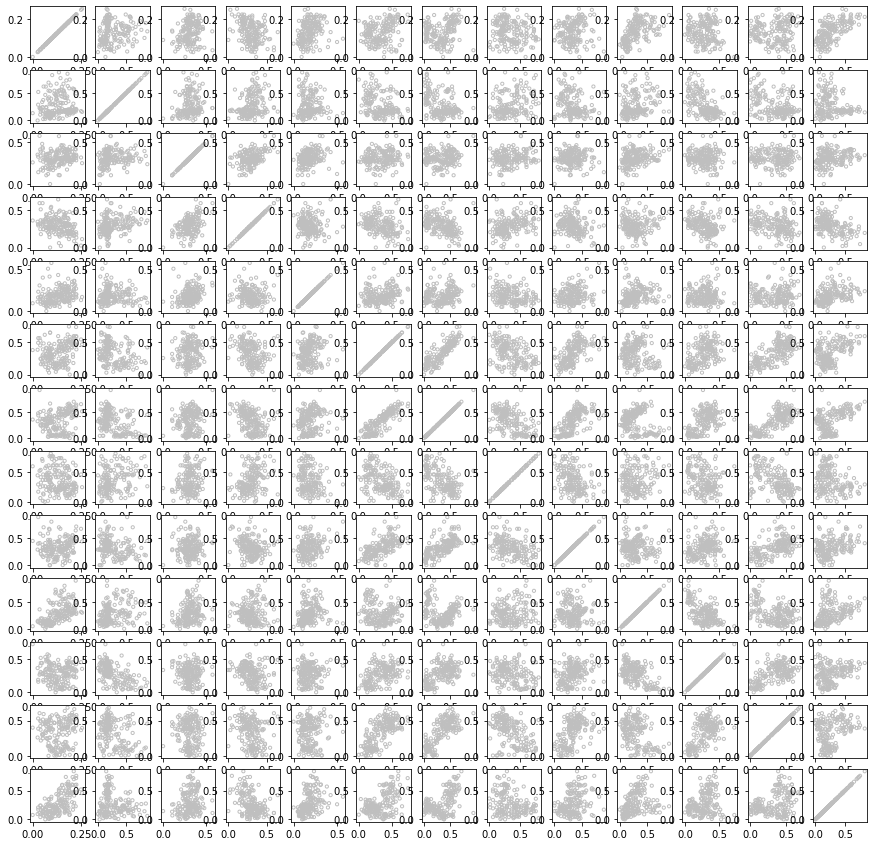

In [1]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
X = np.genfromtxt('wine-clustering.csv', delimiter=',', skip_header = 1)

Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / Xmax

(N,D) = X.shape

plt.figure(figsize = (15, 15))
for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        plt.scatter(X[:,i],X[:,j], s = 10, color = [0.75, 0.75, 0.75], facecolor = 'none')

In [2]:
def train_kmeans(X, mu_init, maxIter):
    (N,D) = X.shape
    (D,K) = mu_init.shape

    mu = np.copy(mu_init.T)
#     mu = mu_init.T
    dist2 = np.zeros((N,K)) 

    for iter in range(0,maxIter):
        for k in range(0,K):
            dist2[:,k] = np.sum((X - np.matlib.repmat(mu[k,:],N,1))**2, axis = 1)

        labels = np.argmin(dist2, axis = 1)
        
        for k in range(0,K):
            mu[k,:] = np.mean(X[labels == k,:], axis = 0)
            
    return labels

In [3]:
def train_MoG(X, mu_init, maxIter):
    X = X.T
    (D,N) = X.shape
    (D,K) = mu_init.shape

    pi = np.random.rand(K)
    pi = pi / np.sum(pi)
    mu = np.copy(mu_init)
#     mu = mu_init
    Num = np.zeros(K)
    
    sigma = np.zeros((D,D,K))
    for k in range(0,K):
        sigma[:,:,k] = 1e-1*np.identity(D)
        
    for iter in range(0, maxIter):
        gamma = np.zeros((K,N))
        for k in range(0,K):
            gamma[k,:] = pi[k]*multivariate_normal.pdf(X.T,mean = mu[:,k], cov = sigma[:,:,k])
        gamma = gamma / np.sum(gamma,axis = 0)

        for k in range(0,K):
            Num[k] = np.sum(gamma[k,:])

            mu[:,k] = np.sum(np.matlib.repmat(gamma[k,:], D, 1)*X, axis = 1) / Num[k]

            res = (X - np.matlib.repmat(mu[:,k].reshape(D,1),1,N))
            gamma_res = np.matlib.repmat(gamma[k,:].reshape(1,N),D,1) * res
            for n in range(0,N):
                sigma[:,:,k] += res[:,n].reshape(-1,1).dot(gamma_res[:,n].reshape(-1,1).T)
            sigma[:,:,k] /= Num[k]
#             sigma[:,:,k] += 1e-10*np.identity(D)

            pi[k] = Num[k] / N
            
    labels = np.argmax(gamma, axis = 0)            
    return labels

[[0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]]
[[0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]]
[[0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.6]]


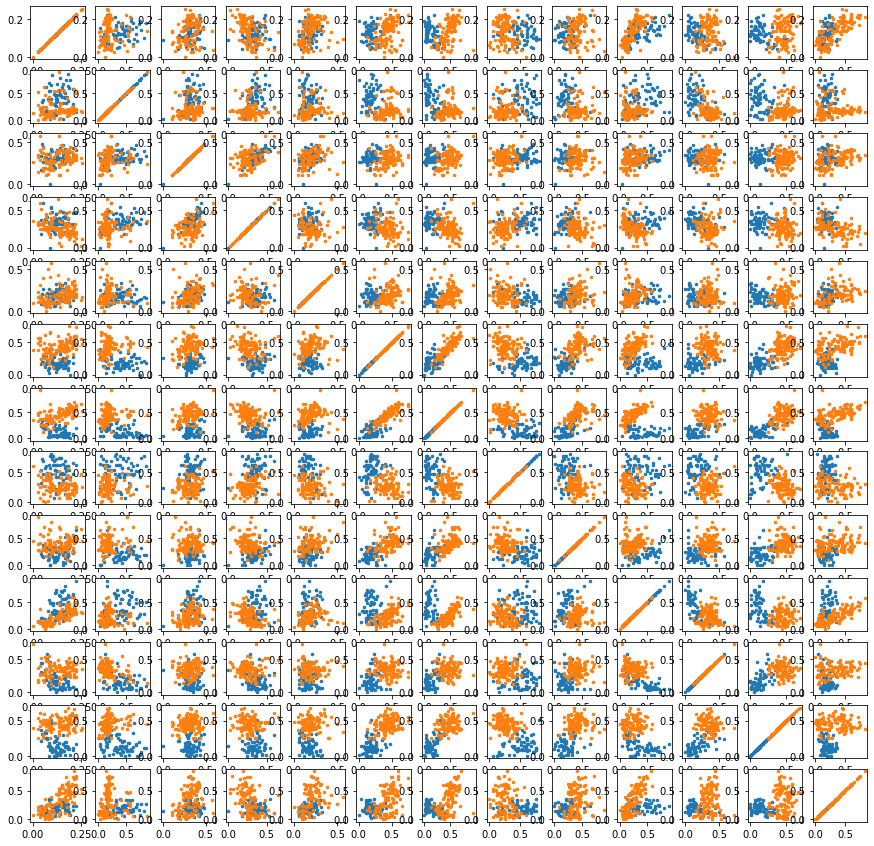

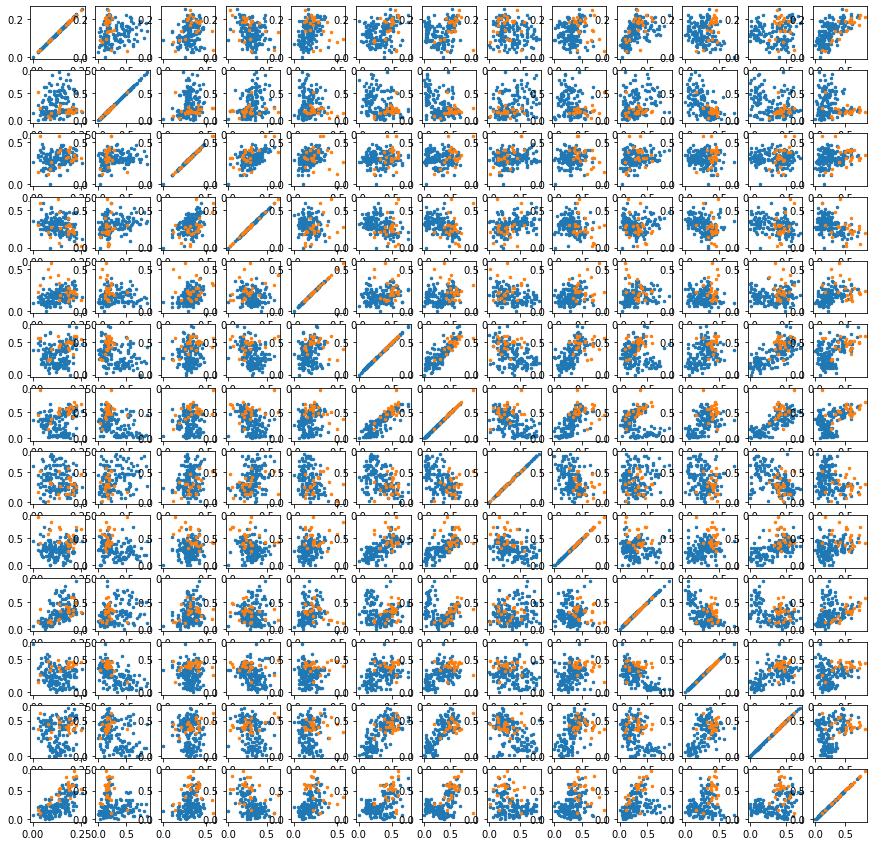

In [4]:
mu_init = np.hstack([0.2*np.ones((13,1)), 0.6*np.ones((13,1))])
maxIter = 20

print(mu_init)
label1 = train_kmeans(X, mu_init, maxIter)
print(mu_init)
label2 = train_MoG(X, mu_init, maxIter)
print(mu_init)

plt.figure(figsize = (15, 15))
for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        for k in range(0,2):
            plt.plot(X[label1 == k,i],X[label1 == k,j],".",markersize = 5)
plt.savefig('kmeans.eps')
            
plt.figure(figsize = (15, 15))
for i in range(0, D):
    for j in range(0, D):
        plt.subplot(D, D, (i + 1) + D*j)
        for k in range(0,2):
            plt.plot(X[label2 == k,i],X[label2 == k,j],".",markersize = 5)        
plt.savefig('mog.eps')